# Wizualizacja danych

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
import numpy as np

# Słupkowy vs kołowy

In [4]:
aluminum = np.array([
    6.4e-5, 3.01e-5, 2.36e-5, 3.0e-5, 7.0e-5, 4.5e-5, 3.8e-5, 4.2e-5, 2.62e-5,
    3.6e-5
])
copper = np.array([
    4.5e-5, 1.97e-5, 1.6e-5, 1.97e-5, 4.0e-5, 2.4e-5, 1.9e-5, 2.41e-5, 1.85e-5,
    3.3e-5
])
steel = np.array([
    3.3e-5, 1.2e-5, 0.9e-5, 1.2e-5, 1.3e-5, 1.6e-5, 1.4e-5, 1.58e-5, 1.32e-5,
    2.1e-5
])

In [5]:
aluminum_mean = np.mean(aluminum)
copper_mean = np.mean(copper)
steel_mean = np.mean(steel)

In [6]:
materials = ['Aluminum', 'Copper', 'Steel']
x_pos = np.arange(len(materials))
CTEs = [aluminum_mean, copper_mean, steel_mean]

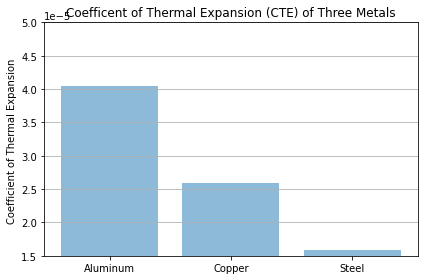

In [7]:

fig, ax = plt.subplots()

ax.bar(x_pos, CTEs, align='center', alpha=0.5)
ax.set_ylabel('Coefficient of Thermal Expansion ')
ax.set_xticks(x_pos)
ax.set_xticklabels(materials)
ax.set_title('Coefficent of Thermal Expansion (CTE) of Three Metals')
ax.yaxis.grid(True)
plt.ylim([1.5e-5,5.0e-5])

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot.png')
plt.show()



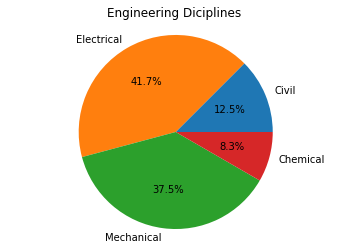

In [8]:
labels = ['Civil', 'Electrical', 'Mechanical', 'Chemical']
sizes = [15, 50, 45, 10]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  
ax.set_title('Engineering Diciplines')


plt.show()

# Wczytaj dane z pliku

In [9]:
inFile = 'http://ww2.amstat.org/publications/jse/datasets/babyboom.dat.txt'
data = pd.read_csv(inFile, sep='[ ]+', header=None, engine='python',names= ['sex', 'Weight', 'Minutes'])
df = data[['Minutes', 'sex', 'Weight']]

In [10]:
df.head()

,Minutes,sex,Weight
5,5,1,3837
104,64,1,3334
118,78,2,3554
155,115,2,3838
257,177,2,3625


# Narysujmy dane <tt>df.Weight.values</tt> jako szereg czasowy

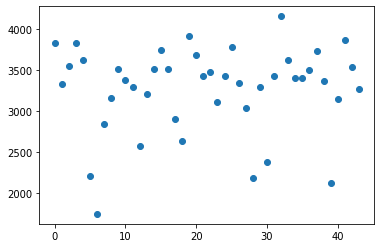

In [11]:
x=df.Weight.values
plt.scatter(np.arange(len(x)), x)
plt.show()

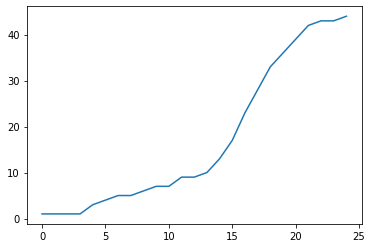

In [15]:
plt.plot( stats.cumfreq (x, numbins =25)[0])
plt.show()

# Narysujmy histogram dla df.Weight.values

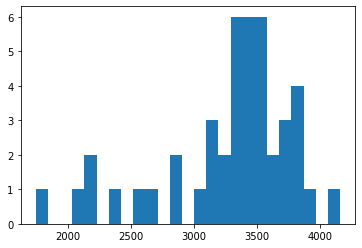

In [14]:
plt.hist(x, bins=25)
plt.show()

# Narysujmy gęstość dla <tt> df.Weight.values</tt> (estymacja jądrowa):

<AxesSubplot:xlabel='Weight', ylabel='Density'>

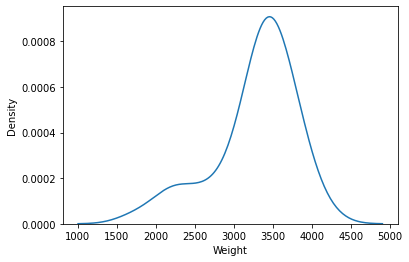

In [17]:
sns.kdeplot(df['Weight'])

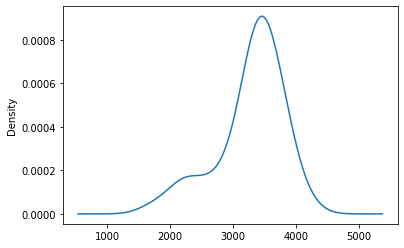

In [16]:
df['Weight'].plot.kde()
plt.show()

# Narysujmy dystrybuantę empiryczną dla <tt>df.Weight.values</tt>

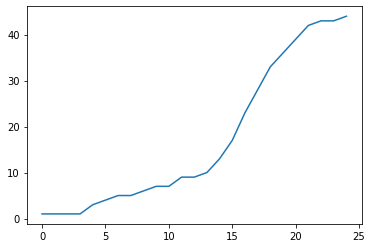

In [18]:
plt.plot(stats.cumfreq(x,numbins=25)[0])
plt.show()

# Narysujmy wykres pudełkowy dla <tt>df.Weight.values</tt>

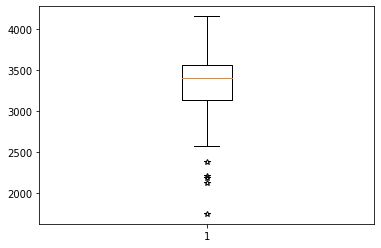

In [19]:
plt.boxplot(x, sym='*')
plt.show()

# Narysujmy wykres skrzypcowy dla <tt>df.Weight.values</tt>

/home/rafal/projects/sages/sages_statystyka1/.statystyka1/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


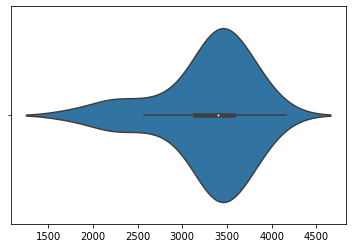

In [20]:
sns.violinplot(x)
plt.show()

# Zadanie
Proszę podzielić próbkę na dwie grupy ze względu na płeć (kolumna ``sex'') i narysować dla nich:
<ul>
<li>wykres w kształcie szeregu czasowego</li>
<li>histogramy</li>
<li>estymacje gęstości</li>
<li>dystrybuanty empiryczne</li>
<li>wykresy pudełkowe</li>
<li>wykresy skrzypcowe</li>
</ul>

# Test: czy próbka pochodzi z rozkładu normalnego 

In [36]:
# Statistics: are the data normally distributed?
def isNormal(data, dataType):
    '''Check if the data are normally distributed'''
    alpha = 0.05
    (k2, pVal) = stats.normaltest(data)
    if pVal < alpha:
        print('{0} are NOT normally distributed.'.format(dataType))
    else:
        print('{0} are normally distributed.'.format(dataType))

In [37]:
isNormal(grouped.get_group('male').Weight, 'male')
isNormal(grouped.get_group('female').Weight, 'female')

male are NOT normally distributed.
female are normally distributed.


/home/rafal/projects/sages/sages_statystyka1/.statystyka1/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
